In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_style("white")


SAVEPLOTS = True

# Define the hopping geometries

In [2]:
def oneDimensionalChain(N):
    HoppingMatrix = np.zeros( ( N , N ) )
    ##  Set the elements of the hopping matrix that define PBC corresponding to the ends of the 1D chain
    HoppingMatrix[0, 1] += 1.;
    HoppingMatrix[0, N - 1] += 1.;
    HoppingMatrix[N - 1, 0] += 1.;
    HoppingMatrix[N - 1, N - 2] += 1.;
    ##  Set the remaining ones
    for i in range(1, N - 1):
        HoppingMatrix[i, i - 1] += 1; HoppingMatrix[i, i + 1] += 1;
    return HoppingMatrix

def iRibbon(x, y, z, Nx, Ny):
    return Nx * Ny * z + Nx * y + x

def nanoribbon(N, Ny):
    Nx = int(N / Ny / 2)
    K = np.zeros((2 * Nx * Ny, 2 * Nx * Ny))
    for x in range(Nx):
        for y in range(Ny):
            if y == (Ny - 1) :
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
            else:
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
    for x in range(Nx):
        for y in range(Ny):
            if y == 0 :
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
            else:
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1

    return K

# Mean field for a 1D Hubbard Chain. Uniform electron density ansatz

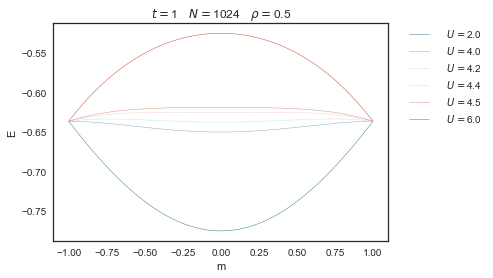

In [3]:
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'm')
plt.ylabel(r'E')

N = 1024
filling = 2 # 2 : quarter filling
Np = int(N / filling)
t = 1

K = oneDimensionalChain(N)

#K = nanoribbon(N, 8)

for idx, U in enumerate(Us):
    
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N

    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    #plt.figure(idx + 1)
    #plt.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    #plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
    #plt.savefig('mfHubbard' + '.png', dpi = 600)
    
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 0.5)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r'$t=$' + r'' + str(t) + r'$\quadN=$' \
              + r'' + str(N) + r'$\quad\rho=$' + r'' + str(1/filling))
    #plt.savefig('mfHubbard' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

if SAVEPLOTS == True:
    plt.savefig('mfHubbard' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

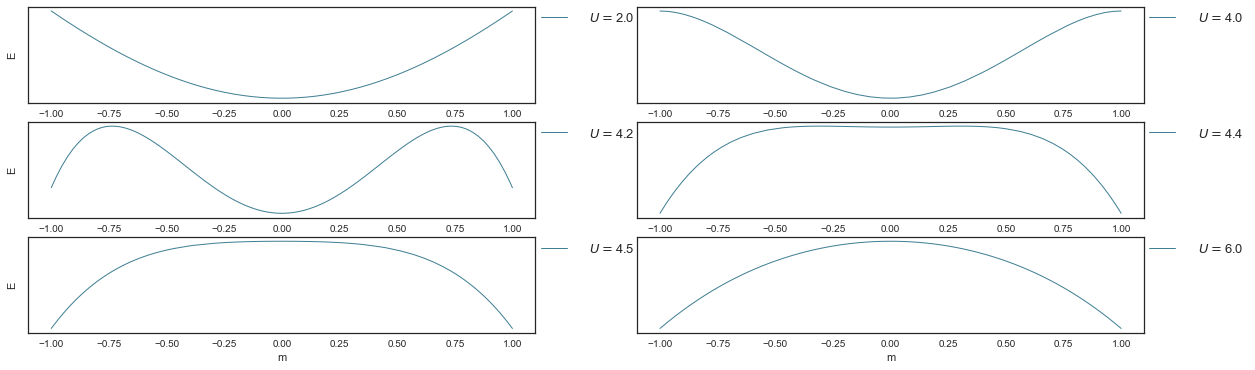

In [4]:
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

f = plt.figure(figsize=(20,6))
nCols = 2

for idx, U in enumerate(Us):
    N = 1024
    filling = 2 # 2 : quarter filling
    Np = int(N / filling)
    t = 1
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    #k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N
    
    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax = f.add_subplot(Us.size/nCols, nCols, idx + 1)
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 13})
    if (idx + 1) > nCols:
        ax.set_xlabel(r'm')
    if (idx + nCols) % nCols == 0:
        ax.set_ylabel(r'E')
    ax.set_yticklabels([])
    
if SAVEPLOTS == True:
    plt.savefig('mfHubbard_multiple' + '.png', dpi = 400, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Non-uniform electron density ansatz

## Define the fermi function for both zero and finite temperature

In [3]:
def fermi(e, mu, beta):
    '''
    For zero temperature, set beta = -1
    '''
    if beta == -1:
        return (e < mu).astype(int)
    else:
        return 1 / ( 1 + np.exp( beta * ( e - mu ) ) )

## Plot function

In [4]:
def plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit):    
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)
    ax.plot(np.arange(N) + 1, nUp, color = "#e74c3c"\
            , label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(N) + 1, nDown, color = "#95a5a6"\
            , label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1),\
                    loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig('densities' + '.png',\
                    dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUp - nDown, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig('magnetization' + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUp - nDown), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig('magnetization' + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(np.arange(energies[itSwitch:].size) + itSwitch, energies[itSwitch:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig('energyMFafterAnnealing' + '.png', dpi = 600, bbox_inches='tight')
        
    plt.figure(4)
    plt.plot(np.arange(energies.size) , energies, color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig('energyMFtotal' + '.png', dpi = 600, bbox_inches='tight')
        
    plt.figure(5)
    plt.plot(np.arange(energies[itMax-lastNit:].size) + (itMax - lastNit)\
             , energies[itMax-lastNit:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig('energyMFlastNit' + '.png', dpi = 600, bbox_inches='tight')
    
    
    a1 = np.arange(Nx)
    a2 = np.arange(Ny)
    vs = np.zeros((2 * Nx * Ny , 2))
    lat = np.zeros((2 * Nx * Ny))
    clr = np.chararray((2 * Nx * Ny), itemsize = 10)
    v1 = np.array([1, 0])
    v2 = np.array([1 / 2, np.sqrt(3) / 2])
    for i in range(Nx):
        for j in range(Ny):
            for k in range(2):
                vs[Nx * Ny * k + Nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 + k *\
                np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
                lat[Nx * Ny * k + Nx * j + i]\
                =  400 * (nUp[Nx * Ny * k + Nx * j + i]\
                          - nDown[Nx * Ny * k + Nx * j + i] )
                if k == 0 : 
                    clr[Nx * j + i] = "#e74c3c"
                if k == 1 : 
                    clr[Nx * Ny + Nx * j + i] = "#95a5a6"

    fig = plt.figure(6)
    ax = fig.add_subplot(111)
    ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat),\
               c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
    ax.axis('equal')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    if SAVEPLOTS == True:
        plt.savefig('MFnanoribbon.png', dpi = 400)

## Reproduce results for a nanoribbon

In [5]:
N = 256 # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 50 # -1 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 1.2 # on-site interaction
muPHS = 0 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / itMax
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
Ny = 8
Nx = int(N / 2 / Ny)
K = nanoribbon(N, Ny)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

nUp = np.array([1 , 0])
for i in range(int(N/2) - 1):
    nUp = np.concatenate((nUp, np.array([1, 0]) ))

nDown = np.array([0, 1])
for i in range(int(N/2) - 1):
    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# Initialize energies
energies = np.zeros(itMax)

while (it < itMax): # add condition of convergence
    
    # Annealing
    
    if ((beta < inftyCutOff \
         and beta < betaTarget) and beta != -1): # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    # To check convergence
    print('delta nUp: ', np.dot(nUp - nUpOld, nUp - nUpOld) / N**2)
    print('delta nDown: ', np.dot(nDown - nDownOld, nDown - nDownOld) / N**2)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    #energies[it] = ( (eUp.real * fermi(eUp.real , mu , beta)).sum()\
    #                + (eDown.real * fermi(eDown.real , mu , beta)).sum() ) / N
    energies[it] = U / N * np.dot(nUp, nDown) + mu * (nUp + nDown).sum()\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    #energies[it] = eHop 
    
    it += 1

beta:  1.0
delta nUp:  0.00048828125
delta nDown:  0.00048828125
<n>:  0.5
beta:  1.1
delta nUp:  0.000124077333662
delta nDown:  0.000124160382321
<n>:  0.797991857222
beta:  1.2100000000000002
delta nUp:  2.8255621021e-05
delta nDown:  2.82760464083e-05
<n>:  0.919902376295
beta:  1.3310000000000004
delta nUp:  7.45007635896e-06
delta nDown:  7.4547898911e-06
<n>:  0.968787406702
beta:  1.4641000000000004
delta nUp:  2.27716488996e-06
delta nDown:  2.27822174086e-06
<n>:  0.988060387396
beta:  1.6105100000000006
delta nUp:  7.72447761398e-07
delta nDown:  7.72678183306e-07
<n>:  0.995548941134
beta:  1.7715610000000008
delta nUp:  2.76951417869e-07
delta nDown:  2.77000310034e-07
<n>:  0.9984222037
beta:  1.9487171000000012
delta nUp:  1.01574235596e-07
delta nDown:  1.01584338929e-07
<n>:  0.999511917192
beta:  2.1435888100000016
delta nUp:  3.74288428408e-08
delta nDown:  3.74308774523e-08
<n>:  0.999919683052
beta:  2.357947691000002
delta nUp:  1.372375523e-08
delta nDown:  1.372

delta nUp:  1.04376778332e-18
delta nDown:  9.88826477105e-19
<n>:  1.00000725197
beta:  50
delta nUp:  6.76419937624e-19
delta nDown:  6.74523534407e-19
<n>:  1.00000725196
beta:  50
delta nUp:  1.74863761771e-18
delta nDown:  5.12181240331e-19
<n>:  1.00000725196
beta:  50
delta nUp:  1.38377737519e-18
delta nDown:  4.61800959354e-19
<n>:  1.00000725196
beta:  50
delta nUp:  1.18543864687e-19
delta nDown:  3.83401309175e-19
<n>:  1.00000725196
beta:  50
delta nUp:  8.92659387747e-18
delta nDown:  6.22096202957e-19
<n>:  1.00000725196
beta:  50
delta nUp:  1.14926607887e-17
delta nDown:  1.12080211175e-18
<n>:  1.00000725196
beta:  50
delta nUp:  3.28040239057e-18
delta nDown:  6.15500221766e-19
<n>:  1.00000725196
beta:  50
delta nUp:  4.0463061107e-19
delta nDown:  3.30528559333e-19
<n>:  1.00000725196
beta:  50
delta nUp:  5.54979706333e-19
delta nDown:  2.04133172715e-19
<n>:  1.00000725196
beta:  50
delta nUp:  3.65092055801e-19
delta nDown:  1.01828977303e-18
<n>:  1.00000725196

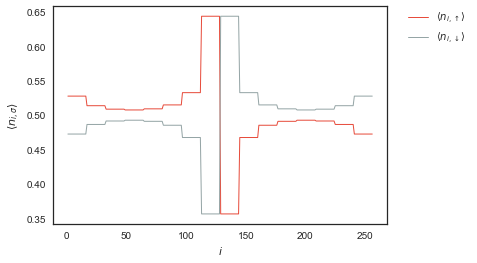

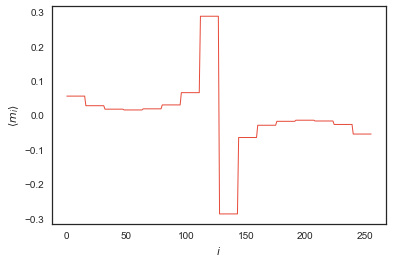

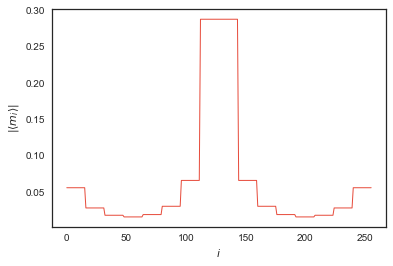

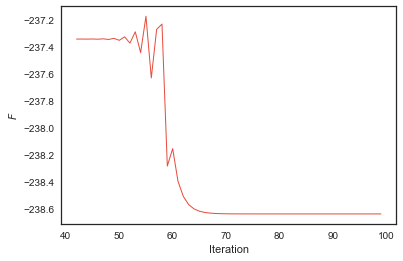

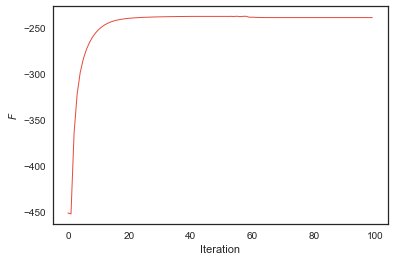

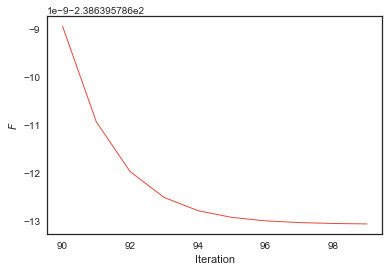

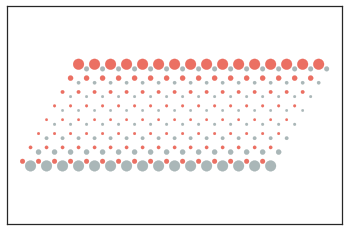

In [6]:
plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, 10)